In [1]:
import torch

if torch.cuda.is_available():
    print("GPU доступен.")
    
    num_gpus = torch.cuda.device_count()
    print(f"Количество доступных GPU: {num_gpus}")
    
else:
    print("GPU недоступен.")

GPU доступен.
Количество доступных GPU: 1


In [2]:
from fastai.vision.all import *
from fastai.imports import *
from fastai.vision.data import ImageDataLoaders
import gc 
import pandas as pd
import numpy as np
%matplotlib inline

In [46]:
path_labels = np.load('C:/Users/USRx/Desktop/Daria/category_img_new.npy',allow_pickle=True)
df = pd.DataFrame(path_labels, columns=['path','label'])

In [47]:
train_df = pd.DataFrame(columns=['path', 'label'])
test_df = pd.DataFrame(columns=['path', 'label'])

unique_labels = df['label'].unique()

In [50]:
for label in unique_labels:
    label_data = df[df['label'] == label]
    
    train_size = int(len(label_data)*0.8)
    
    train_data = label_data[:train_size]
    test_data = label_data[train_size:]
    
    train_df = pd.concat([train_df, train_data])
    test_df = pd.concat([test_df, test_data])

In [51]:
print("Train Data:")
print(train_df.shape,len(train_df['label'].unique()))
print("nTest Data:")
print(test_df.shape,len(test_df['label'].unique()))

Train Data:
(231357, 2) 46
nTest Data:
(57865, 2) 46


In [7]:
data = ImageDataLoaders.from_df(df=train_df,
                                bs=64,
                                seed=42,
                                shuffle=True,
                                item_tfms=Resize(224),
                                batch_tfms=aug_transforms(min_scale=0.9),
                                valid_pct=0.1)

c:\Users\USRx\anaconda3\envs\python_torch_3-9-19\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


In [8]:
data_test = ImageDataLoaders.from_df(df=test_df,
                                bs=64, 
                                item_tfms=Resize(224))

c:\Users\USRx\anaconda3\envs\python_torch_3-9-19\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


In [9]:
#learn = vision_learner(data, vgg16, metrics=accuracy, weights='VGG16_Weights.DEFAULT')
#learn.fine_tune(15)

In [10]:
#learn = vision_learner(data, resnet34, metrics=accuracy, weights='ResNet34_Weights.DEFAULT')
#learn.fine_tune(10)

In [11]:
learn = vision_learner(data, efficientnet_b2, metrics=accuracy,weights=EfficientNet_B2_Weights.DEFAULT)
learn.fine_tune(10)

c:\Users\USRx\anaconda3\envs\python_torch_3-9-19\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\USRx\anaconda3\envs\python_torch_3-9-19\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to C:\Users\USRx/.cache\torch\hub\checkpoints\efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:01<00:00, 31.7MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.809305,1.596727,0.534731,46:12


c:\Users\USRx\anaconda3\envs\python_torch_3-9-19\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


epoch,train_loss,valid_loss,accuracy,time
0,1.521417,1.413306,0.584439,47:12
1,1.437437,1.301098,0.617203,46:53
2,1.363957,1.214382,0.641755,47:30
3,1.308365,1.159044,0.656711,47:11
4,1.241770,1.124838,0.668857,47:11
5,1.168729,1.102826,0.672660,46:56
6,1.156606,1.092353,0.677545,48:00
7,1.121612,1.084452,0.678539,48:08
8,1.165025,1.074702,0.679793,47:33
9,1.128305,1.076408,0.680225,47:22


In [ ]:
learn = vision_learner(data, resnet34, metrics=accuracy, pretrained=True)
learn.fine_tune(2)
learn.save('resnet34_1')

In [ ]:
gc.collect()
torch.cuda.empty_cache()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

In [ ]:
interp.most_confused(min_val=50)

In [ ]:
learn_2 = vision_learner(data, resnet34, metrics=accuracy)
lr_range = learn_2.lr_find()

In [ ]:
lr_range

In [ ]:
learn_3 = vision_learner(data, resnet34, metrics=accuracy)
learn_3.fine_tune(3, base_lr=0.0012)

In [ ]:
learn_4 = vision_learner(data, resnet34, metrics=accuracy)
learn_4.fine_tune(3, base_lr=0.0025)

In [12]:
learn_5 = vision_learner(data, resnet34, metrics=accuracy)
learn_5.fine_tune(3, base_lr=0.0032)

epoch,train_loss,valid_loss,accuracy,time
0,1.585860,1.392441,0.588502,44:54


epoch,train_loss,valid_loss,accuracy,time
0,1.326653,1.218656,0.644824,45:00
1,1.186474,1.071219,0.685887,45:04
2,1.045812,1.009745,0.704949,45:06


In [ ]:
learn_6 = vision_learner(data, resnet34, metrics=accuracy)
learn_6.fine_tune(3, base_lr=0.0018)

In [13]:
learn_5.unfreeze()

SuggestedLRs(valley=9.999999747378752e-06)

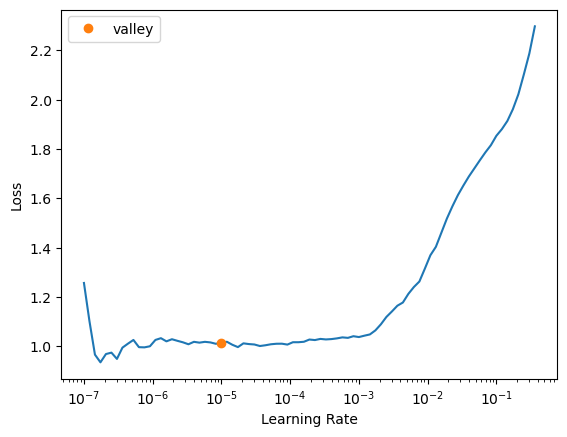

In [14]:
learn_5.lr_find()

In [15]:
learn_5.fit_one_cycle(6, lr_max=slice(1e-7, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.978734,1.008492,0.705770,44:58
1,1.024327,1.007443,0.705684,45:05
2,1.033950,1.009293,0.706462,45:02
3,0.991427,1.005734,0.705684,45:05
4,0.956027,1.005436,0.706635,45:11
5,0.976426,1.006335,0.706030,45:18


In [ ]:
learn_5.recorder.plot_loss()

In [16]:
model = learn_5.model
model.cpu()
torch.save(model, 'cat_resnet34.pkl')

In [17]:
learn_5.export("cat_resnet34_export.pkl")

In [18]:
with open('cat_resnet34_open.pkl', 'wb') as file:
    pickle.dump(learn_5, file)